In [1]:
"""
*****************************************************************************
*
* file_name:      Employ_Retaintation_EDA_Python.py
* version:        1.0
* author:         AJIT KUMAR PATEL
* creation date:  20-OCT-2022
*
* change history:
* description:    Pyhton Exploratary analysis (univariate,Bivariate,multivariate)

****************************************************************************
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("hr_employee_churn_data.csv")

In [3]:
import copy
df = copy.deepcopy(dataset)

In [4]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
## USING PANDAS DATAFRAME TO DO EDA:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file='Employee_Retantion_pandasprofile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# printing the shape of data shape
print('the no of row present in the data frame = ',df.shape[0])
print('the no of column present in the data frame = ',df.shape[1])
print("*"*50)
print('the no of data present in the data frame = ',df.size)

the no of row present in the data frame =  14999
the no of column present in the data frame =  10
**************************************************
the no of data present in the data frame =  149990


In [7]:
#Getting all the columns
print("Features of the dataset:")
df.columns

Features of the dataset:


Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [8]:
# Gathering hte information of our data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [9]:
# unique values
df.apply(lambda x: len(x.unique()))

empid                    14999
satisfaction_level          93
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
promotion_last_5years        2
salary                       3
left                         2
dtype: int64

In [10]:
# transposing the description of our all numerical data for better understanding
df.describe().T

,count,mean,std,min,25%,50%,75%,max
empid,14999.0,7500.000000,4329.982679,1.00,3750.50,7500.00,11249.50,14999.0
satisfaction_level,14997.0,0.612863,0.248634,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


In [11]:
null = df.isna().sum().sort_values(ascending = False)
null

satisfaction_level       2
empid                    0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [12]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [13]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

# find Numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 1 categorical variables
There are 9 numerical variables


In [14]:
#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=20:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'unique values and those are\n',df[i].value_counts())
    print("*"*50)

empid has 14999 unique value
**************************************************
satisfaction_level has 92 unique value
**************************************************
last_evaluation has 65 unique value
**************************************************
number_project has 6 unique values and those are
 4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64
**************************************************
average_montly_hours has 215 unique value
**************************************************
time_spend_company has 8 unique values and those are
 3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64
**************************************************
Work_accident has 2 unique values and those are
 0    12830
1     2169
Name: Work_accident, dtype: int64
**************************************************
promotion_last_5years has 2 unique values and those are
 0    1468

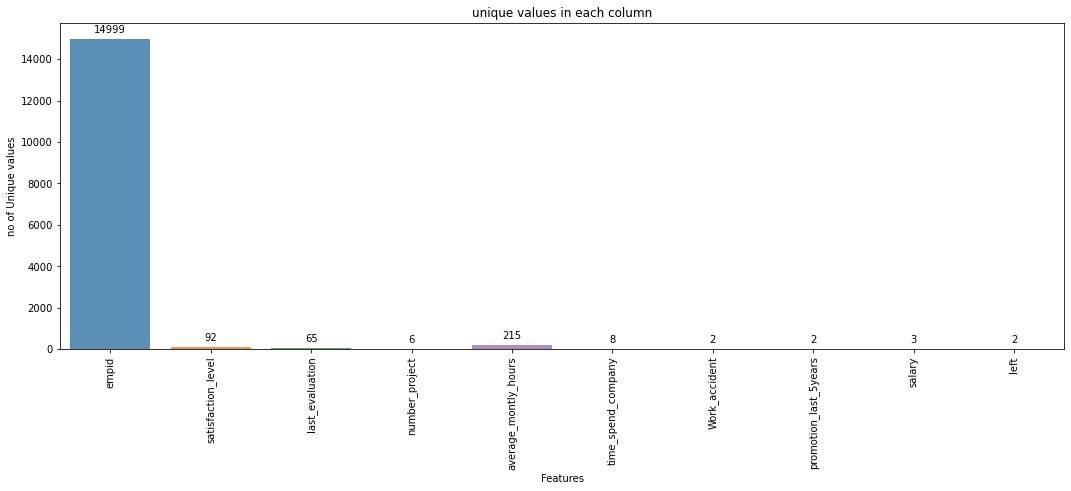

In [15]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique


plt.figure(figsize=(18,6))
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('unique values in each column')
plt.ylabel('no of Unique values')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

In [16]:
continuous = [var for var in numerical if var not in ['left']]
print(list(continuous))

['empid', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


In [17]:
##Classifying the data into categorical and numerical data
categorical_data = []
numerical_data = []
for col in df.columns:
    unique_values = len(df[col].unique())
    if unique_values < 5:
        categorical_data.append(col)
    else:
        numerical_data.append(col)

In [18]:
for x in categorical_data:
        ("{} : {} values".format(x, df[x].unique()))
# print('**'*50)
for x in numerical_data:
        ("{} : {} values".format(x, df[x].unique()))

In [19]:
categorical_data

['Work_accident', 'promotion_last_5years', 'salary', 'left']

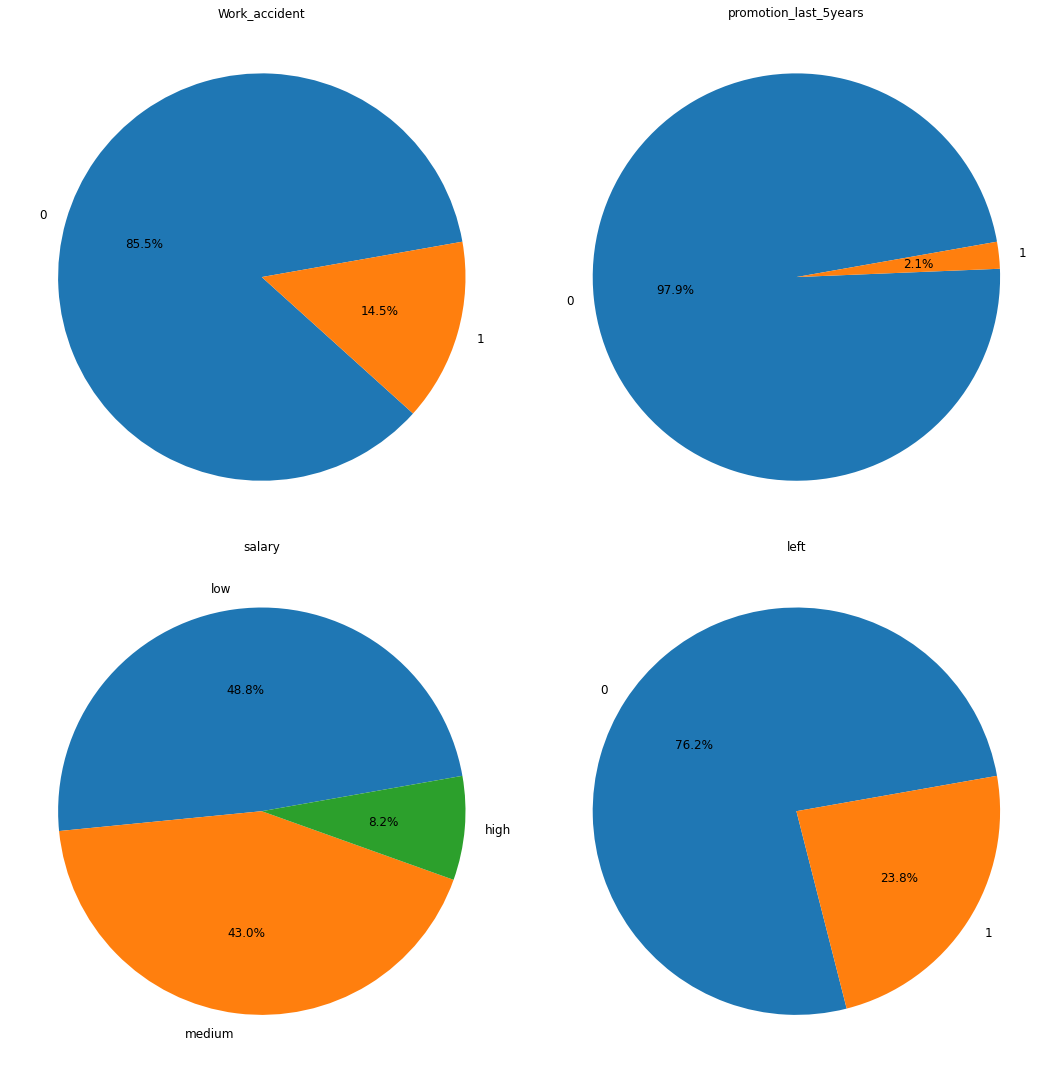

In [20]:
#making pie chart for all catagorical type varibale
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = [ax for categorical_data in axes for ax in categorical_data]

for i, c in enumerate(df[categorical_data]):
  df[c].value_counts().plot(kind = 'pie', ax=axes[i], title=c, autopct='%1.1f%%', fontsize=12,startangle=10)
  axes[i].set_ylabel('')    
  plt.tight_layout()

### 1)Take-away(left): in the training set, less people left than didn't.it seems there is data imbalance..
### 2)take-away(medium): low salaried employee count is high in given dataset as expected

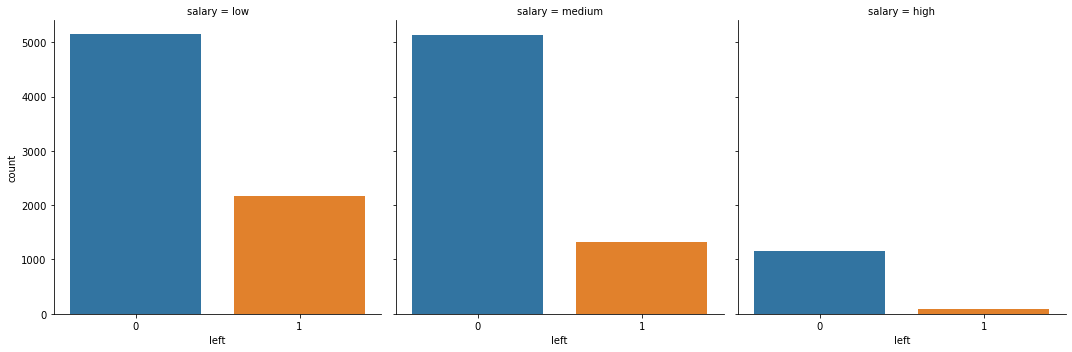

In [21]:
#feature 'left' split over the feature 'salary'.
sns.catplot(x='left', col='salary', kind='count', data=df);


## Take-away: it seem low salaried employees have high churning rate

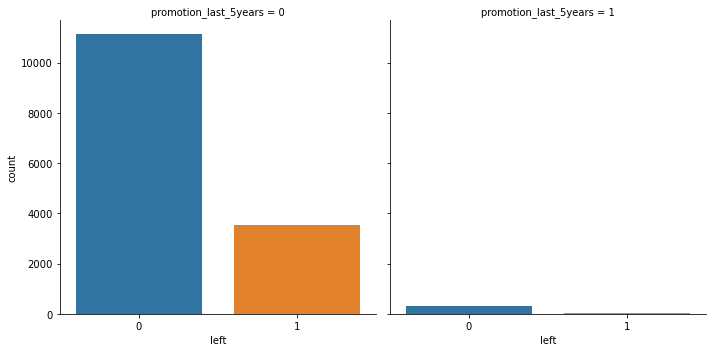

In [22]:
#feature 'left' split over the feature 'promotion_last_5years'.
#fig = plt.figure(figsize=(15,7))
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df);

## Take-away: it seems people left more who did not made accident...we can say it is less imp feature 

In [23]:
print(numerical_data,end = " ")

['empid', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company'] 

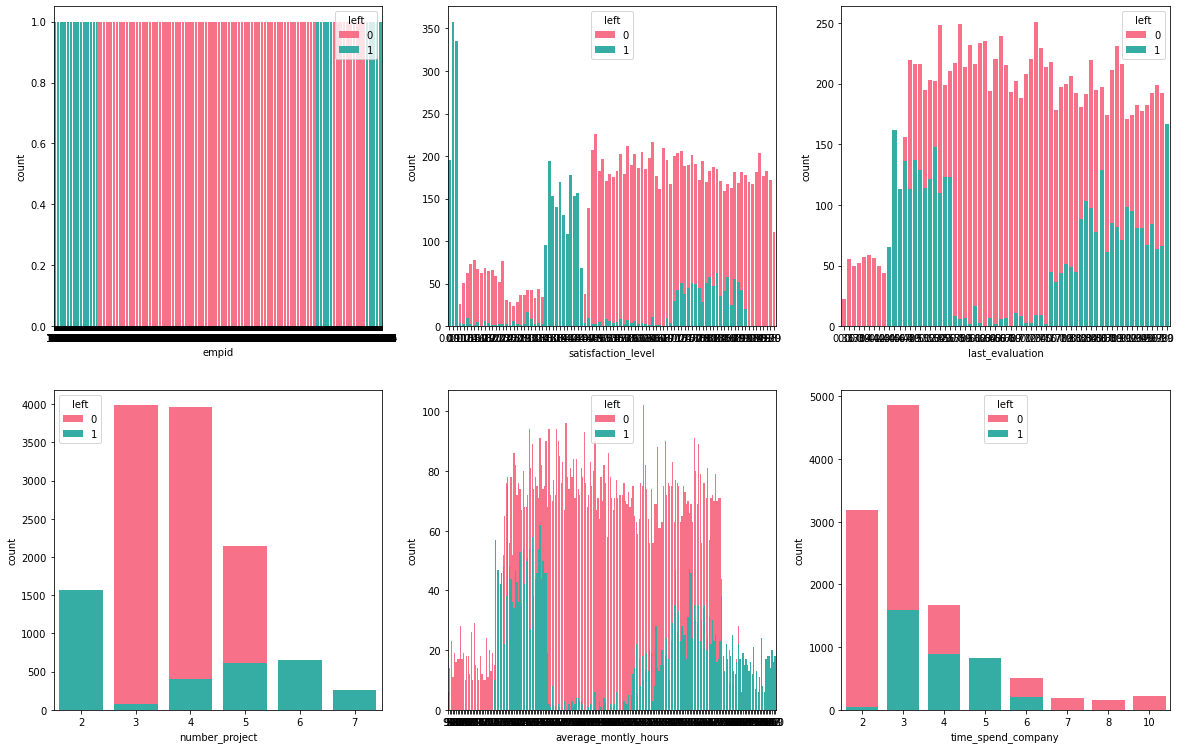

In [24]:
#making a count plot for the catagorical type varible relation with dependent varible "price range"
count = 1
plt.figure(figsize = (20,20))
for cat in numerical_data:
  plt.subplot(3,3,count)
  sns.countplot(x = cat, data = df,hue='left', palette = 'husl',dodge=False,saturation=1)
  count+=1

### take-away: sl distributed from 0.1 to 1 where it has high count at 0.1
### take-away: employee left most who has less satisfication level range from 0.2 to 0.5
### take-away: number_project distributed from 2 to 7 where it has high count at 4
### take-away: employee left when project count high.and employee retain who has number_project between 3-4
### take-away: last_evaluation distributed from 0.35 to 1 where it has high count at around 0.55
### take-away: not much impact but employee left who has high last_evaluation value
### take-away: average_montly_hours distributed from 100 to 300 where it has high count at around 150
### take-away: employee left who has high average_montly_hours value
### take-away: time_spend_company distributed from 2 to 10 where it has high count at around 3 and low at 9
### take-away: employee left who has high time_spend_company value...

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


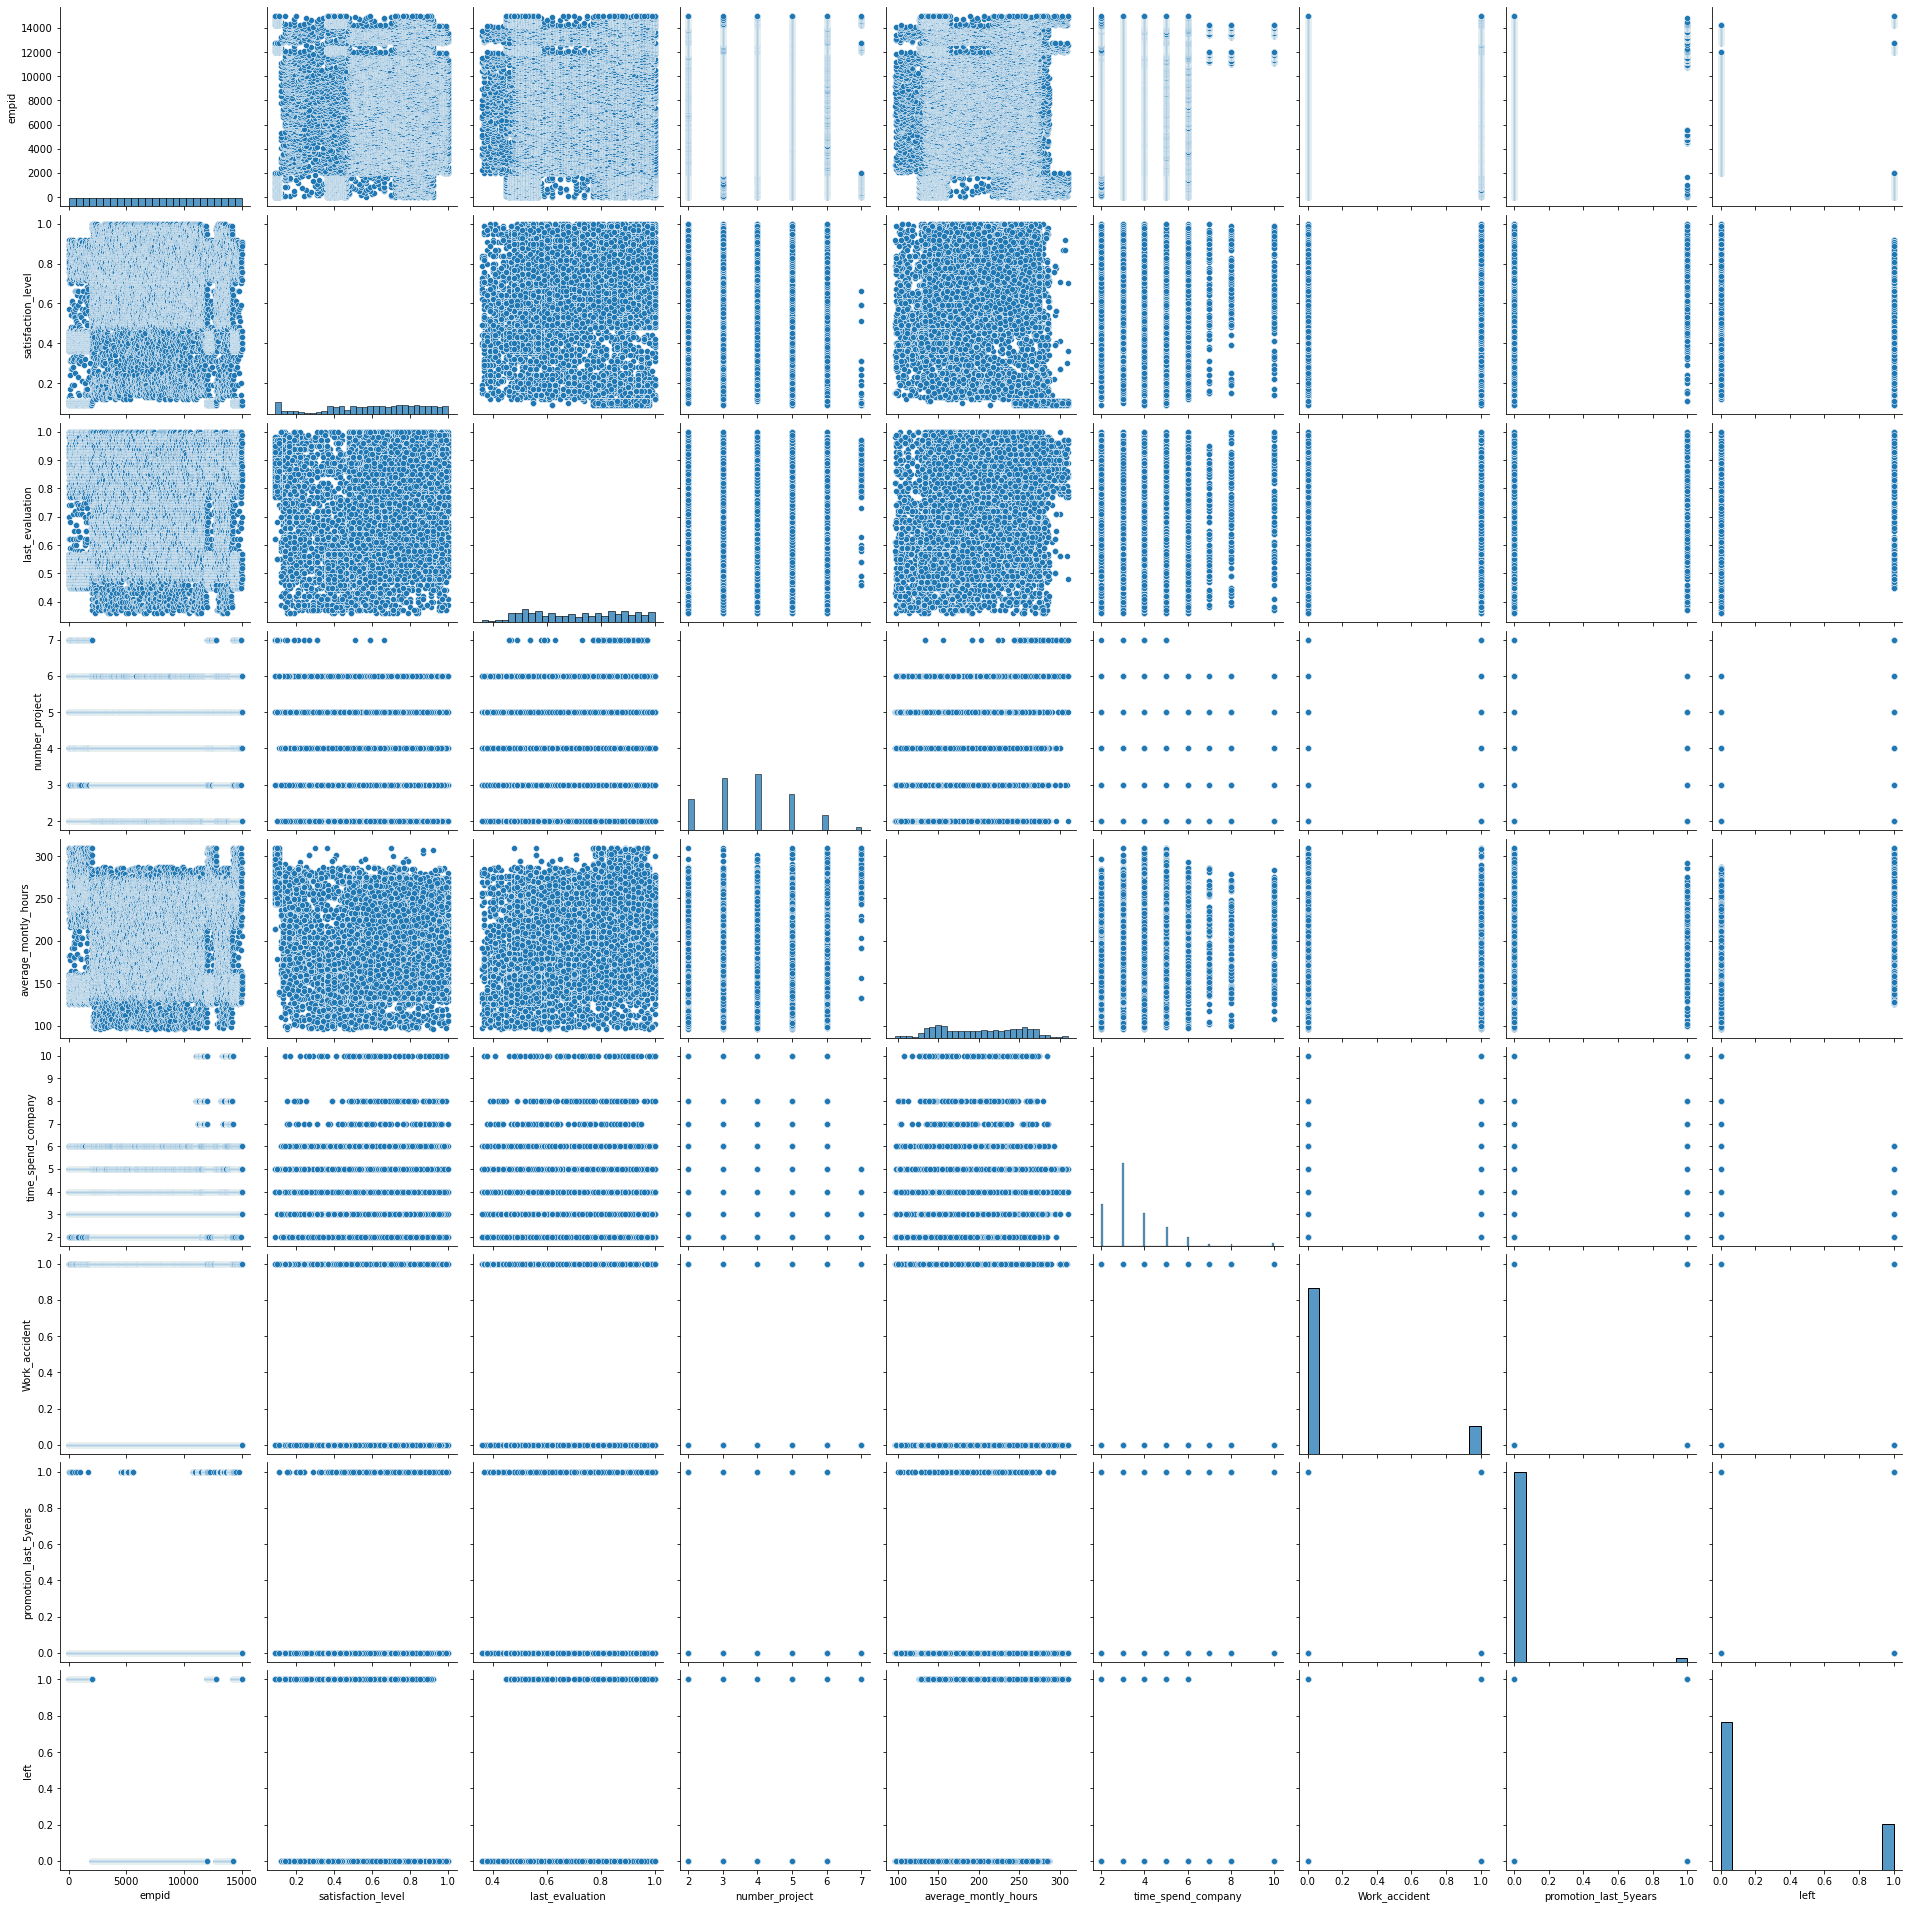

In [25]:
sns.pairplot(df, size=3)

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


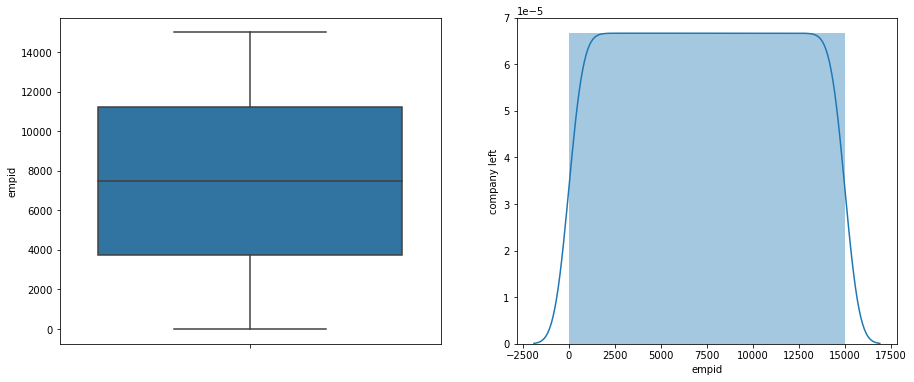

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


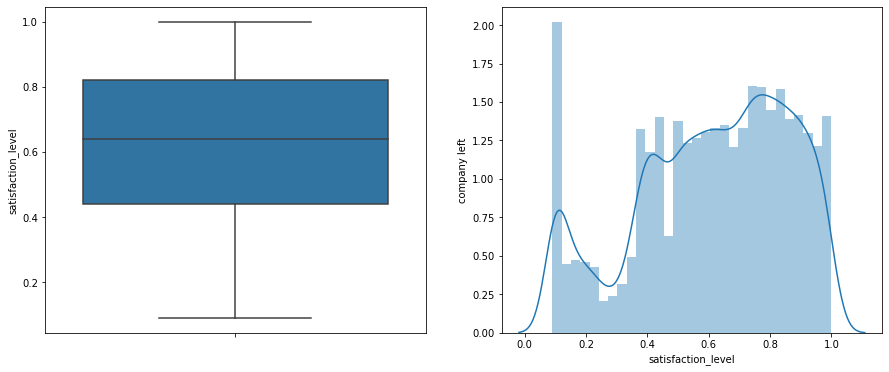

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


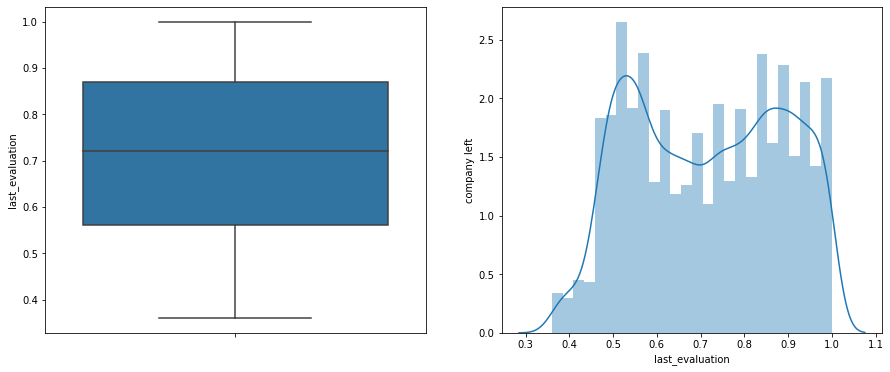

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


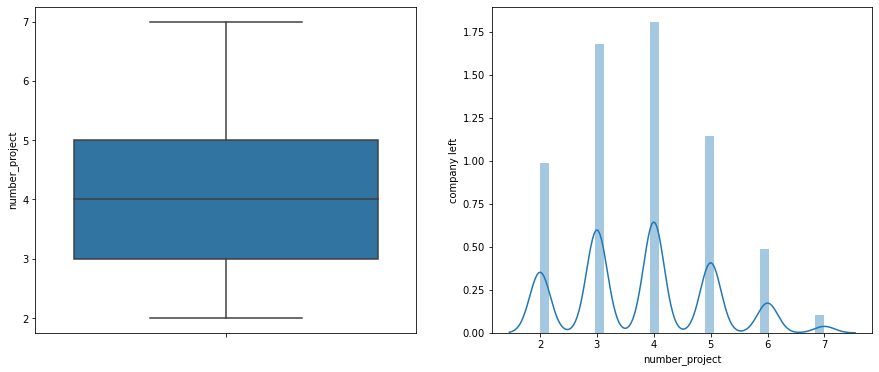

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


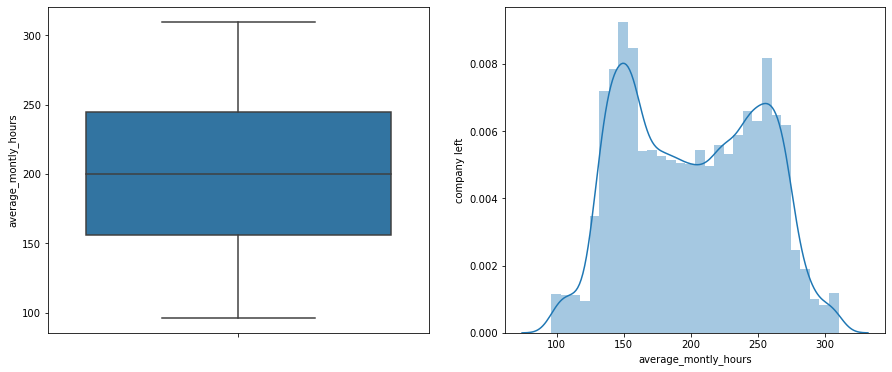

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


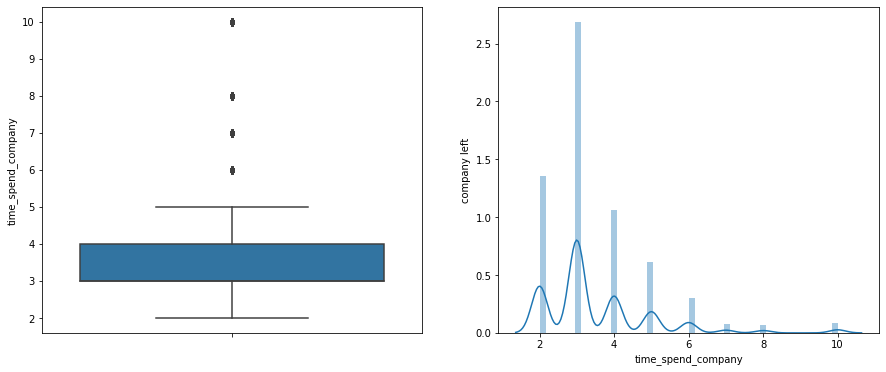

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


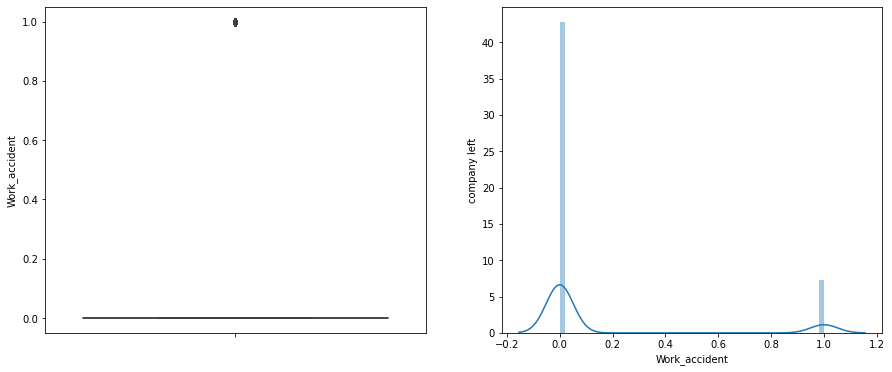

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


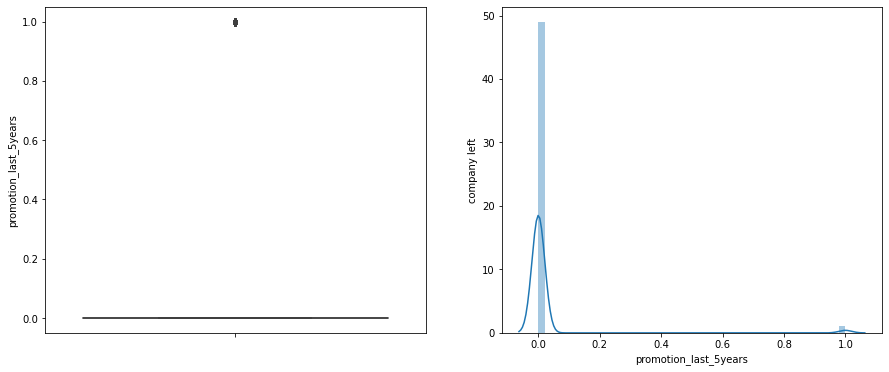

In [26]:
## ploting boxplot to visualize outlier and subplot to visualize distribution
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_ylabel('company left')
    fig.set_xlabel(var)

    plt.show()

In [27]:
TABLE = {'SKEWNESS': df.skew(), 'KURTUSIS': df.kurt()}
TABLE_CHECK = pd.DataFrame(TABLE)
TABLE_CHECK

C:\Users\AJIT\AppData\Local\Temp/ipykernel_6960/3805058582.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TABLE = {'SKEWNESS': df.skew(), 'KURTUSIS': df.kurt()}


,SKEWNESS,KURTUSIS
empid,0.000000,-1.200000
satisfaction_level,-0.476662,-0.670548
last_evaluation,-0.026622,-1.239040
number_project,0.337706,-0.495478
average_montly_hours,0.052842,-1.134982
time_spend_company,1.853319,4.773211
Work_accident,2.021149,2.085320
promotion_last_5years,6.636968,42.054957
left,1.230043,-0.487060


In [28]:
high_skew = ['time_spend_company','Work_accident','promotion_last_5years','left']

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

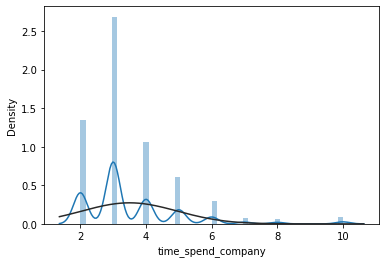

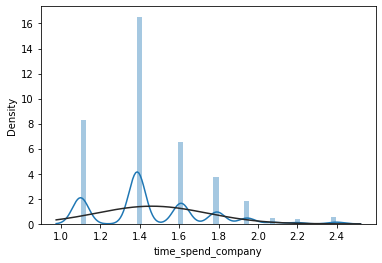

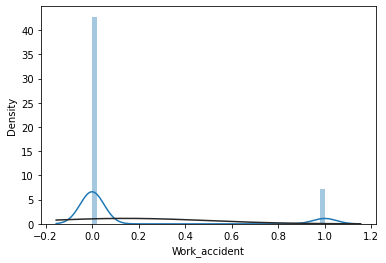

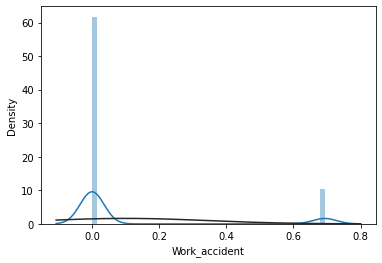

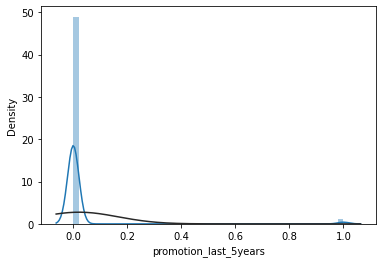

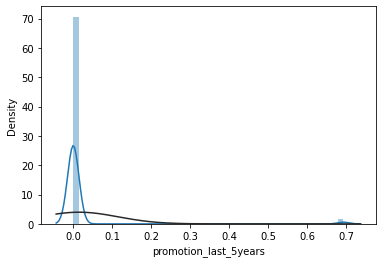

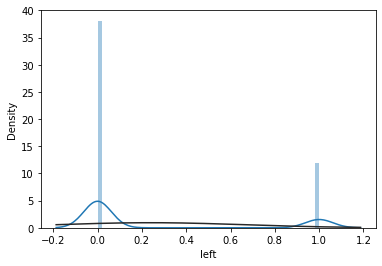

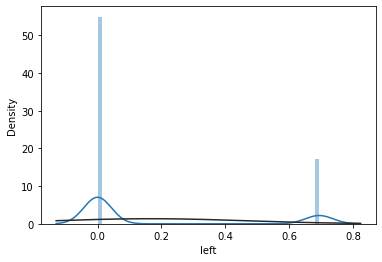

<Figure size 432x288 with 0 Axes>

In [29]:
from scipy.stats import norm
for i in high_skew:
  sns.distplot(df[i], fit=norm);
  fig = plt.figure()

  sns.distplot((df[i]+1).transform(np.log), fit=norm);
  fig = plt.figure()

C:\Users\AJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


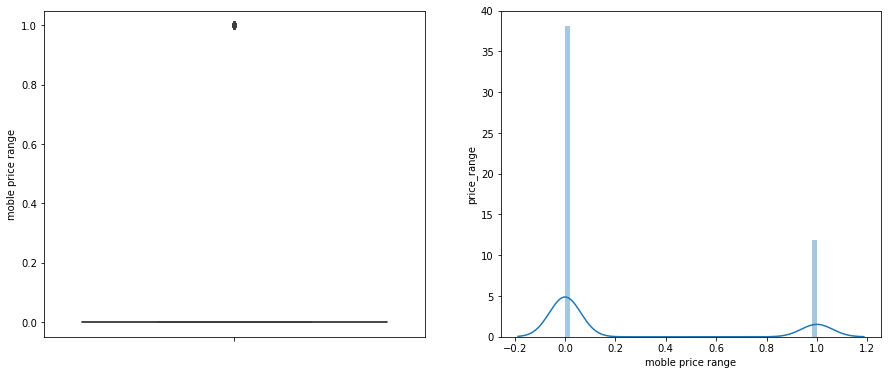

In [30]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=df["left"])
fig.set_title('')
fig.set_ylabel("moble price range")
    
plt.subplot(1, 2, 2)
fig = sns.distplot(df["left"].dropna())
fig.set_ylabel('price_range')
fig.set_xlabel("moble price range")

plt.show()

In [31]:
TABLE = {'SKEWNESS': df.skew(), 'KURTUSIS': df.kurt()}
TABLE_CHECK = pd.DataFrame(TABLE)
TABLE_CHECK

C:\Users\AJIT\AppData\Local\Temp/ipykernel_6960/3805058582.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TABLE = {'SKEWNESS': df.skew(), 'KURTUSIS': df.kurt()}


,SKEWNESS,KURTUSIS
empid,0.000000,-1.200000
satisfaction_level,-0.476662,-0.670548
last_evaluation,-0.026622,-1.239040
number_project,0.337706,-0.495478
average_montly_hours,0.052842,-1.134982
time_spend_company,1.853319,4.773211
Work_accident,2.021149,2.085320
promotion_last_5years,6.636968,42.054957
left,1.230043,-0.487060


<AxesSubplot:>

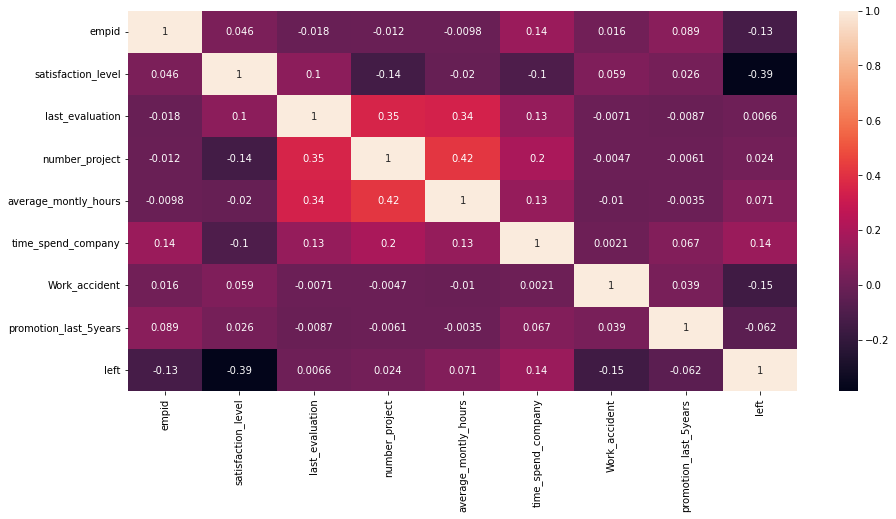

In [32]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)